## Linear regression in Python

Linear regression is a simple technique that measures the relationship between two (or more) variables. If we have an independent variable $X$ and a dependent variable $Y$, linear regression allows us to determine which linear model $Y = \alpha + \beta X$ best explains the data.

As a simple example applied to the financial world, let's consider TSLA and SPY. We would like to known how TSLA varies as a function of how SPY varies, so we will take the daily returns of each and regress them against each other.


In [23]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import os

In [31]:
def linreg(X, Y):
    # running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9); # add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    plt.grid(True)
    return model.summary()

We need to retrieve our real world data.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     27.29
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           3.71e-07
Time:                        18:33:39   Log-Likelihood:                 532.25
No. Observations:                 251   AIC:                            -1061.
Df Residuals:                     249   BIC:                            -1053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.002      0.275      0.784      -0.003       0.004
x1             1.2795      0.245      5.224      0.000       0.797       1.762
==============================================================================
Omnibus:                       52.778   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.186
Skew:                          -0.173   Prob(JB):                    7.72e-169
Kurtosis:                      11.597   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

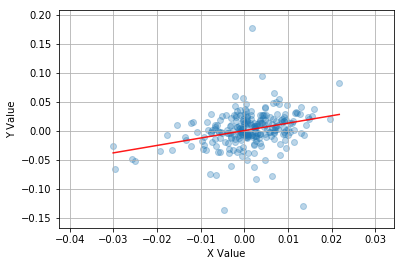

In [32]:
asset = pd.read_csv(filepath_or_buffer=data_path+'/TSLA.csv')['Close']
benchmark = pd.read_csv(filepath_or_buffer=data_path+'/SPY.csv')['Close']

# we have to take the percent changes to get the returns
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)

The interpretation we can make out this model is that for every 1% move in SPY (X value), TSLA is expected to see an increase of 1.28%. This is the $\beta$ in our model.

### Linear regression vs. Correlation

- Linear regression gives us a specific linear model but it remains limited to cases of linear dependence.
- Correlation is general to linear or non-linear dependencies but it does not give an actual model.
- Both are measures of covariance.
- Linear regression can give us the relationship between $Y$ and many independent variables by making $X$ multidimensional.

### Parameters vs. Estimates
Keep in mind that all $\alpha$ and $\beta$ parameters estimated by linear regression are just that - estimates. You can never know the underlying true parameters unless you know the physical process producing the data. It is very important when doing actual analysis to the standard error of the parameters estimates. One way to get a sense of how stable your parameter estimates are is to use rolling window of data and see how much variance is in the estimates.





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1360
Date:                Sat, 04 Jan 2020   Prob (F-statistic):              0.713
Time:                        18:49:34   Log-Likelihood:                -21.091
No. Observations:                 100   AIC:                             46.18
Df Residuals:                      98   BIC:                             51.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5002      0.060      8.269      0.000       0.380       0.620
x1            -0.0378      0.102     -0.369      0.713      -0.241       0.166
==============================================================================
Omnibus:                       58.462   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.678
Skew:                           0.178   Prob(JB):                       0.0215
Kurtosis:                       1.690   Cond. No.                         4.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

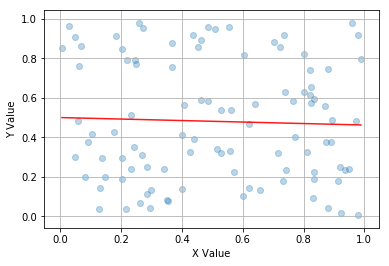

In [35]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X, Y)

When looking at 2 purely random variables, all we see is just a uniform cloud of points. Even with 100 data points, the line has a visible slope due to random chance. It is crucial to use statistical tests and not visualizations to verify your results.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           4.26e-24
Time:                        18:52:38   Log-Likelihood:                 18.722
No. Observations:                 100   AIC:                            -33.44
Df Residuals:                      98   BIC:                            -28.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0368      0.041      0.906      0.367      -0.044       0.117
x1             0.9295      0.069     13.504      0.000       0.793       1.066
==============================================================================
Omnibus:                        4.525   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.874
Skew:                          -0.451   Prob(JB):                        0.144
Kurtosis:                       3.340   Cond. No.                         4.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

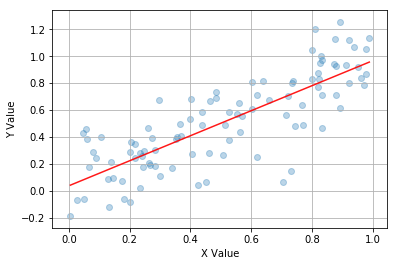

In [36]:
Y =  X + 0.2 * np.random.randn(100)
linreg(X, Y)

If we make $Y$ dependent on $X$ plus some random noise, the line of best fit models the Y independent variable quite well (R-squared is 0.65).

### Evaluating and reporting results
Regression model relies on several important assumptions:
- The independent variable is not random
- The variance of the error is constant across observations. Important for evaluating the goodness of fit
- Errors are not autocorrelated. The Durbin-Watson statistic detects this; if it close to 2, there is no autocorrelation.
- The errors are normally distributed. If this does not hold, we cannot use some of the statistics such as the F-test.

Only if we are sure that these assumptions are satisfied, we can safely use the statistics reported to analyze the fit. 

When making a prediction based on the model, it's useful to report not only a single value byt a confidence interval.

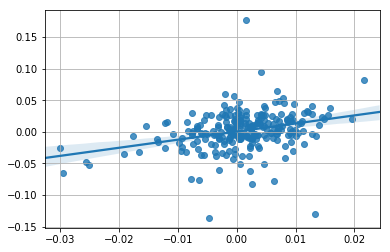

In [40]:
import seaborn

seaborn.regplot(r_b.values, r_a.values)
plt.grid(True);

### Quick mathematical background

#### Ordinary Least Squares

Regression works by optimizing the placement of the line of best fit (or plane in higher dimensions). It does so by defining how bad the fit is using an objective function. In OLS the objective function is:

$\sum_{i=1}^n (Y_i - a - bX_i)^2 $

We use `a` and `b` to represent the potential candidates for $\alpha$ and $\beta$. This function will decrease as we get better parameter estimates. Regression is a simple case of numerical optimization that has a closed form solution and does not need any optimizer. We just find the results that minimize the objective function.

#### Standard Error

We can also find the standard error of estimate, which measures the standard deviation of the error term $\epsilon$, by getting the scale parameter of the model returned by the regression and taking its square root. THe formula for standard error of estimate is:

$s = (\frac{\sum_{i=1}^n \epsilon_i^2}{n-2}) ^ {1/2} $

If $\hat a$ and $\hat b$ were the true parameters ($\hat a = \alpha$ and $\hat b = \beta$) we could represent the error for a particular predicted value of $Y$ as $s^2$ for all values of $X_i$. We could simply square the difference $(Y - \hat Y)$ to get the variance because $\hat Y$ incorporates no error in the parameter estimates themselves. Because $\hat \alpha$ and $\hat \beta$ are merely estimates in our construction of the model of $Y$, any predicted value, $\hat Y$, will have their own standard error based on the distribution of the $X$ terms that we plug into the model. This forecast error is represented by the following:

$s^2_f = s^2 (1 + \frac{1}{n} + \frac{(X - \mu_x)^2}{(n - 1)\sigma^2_X}) $

where $\mu_X$ is the mean of our observations of $X$ and $\sigma_X$ is the standard deviation of $X$. This adjustment to $s^2$ incorporates the uncertainty in our parameter estimates. Then the 95% confidence interval for the prediction is $\hat Y \pm t_c s_f$ where $t_c$ is the critical value of the t-statistic for $n$ samples and a desired 95% confidence.